# Project: CO2 Emissions since the UNFCCC

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Climate Change and environmental degradation have become issues of widespread concern. Within this report, I am taking historic data on population growth, per capita CO2-emissions and per capita GDT to provide some perspective on the changes within the anthropocene.
Specifically, I would like to shed some light on our global efforts since the the United Nations Framework Convention on Climate Change (UNFCCC) has been adopted in 1992.

First, I will explore how the different regions performed in terms of reducing CO2 emissions since the international environmental treaty has been adopted in 1992. And how is the overall effect?

Furthermore, I would like to explore what is associated with increasing/ decreasing, high/ low CO2 emissions?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns 

%matplotlib inline
sns.set()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

All data sets that are used are from gapminder.org and represent time series for a specific indicator. All values are numeric (either floats or integers).

In [3]:
# loading per capita CO2-emissions
# source: gapminder.org; CIDAC: https://cdiac.ess-dive.lbl.gov/trends/emis/overview_2014.html
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv', index_col='country')

print('Shape CO2-Emissions data set:' + str(df_co2.shape))
df_co2.head(3)

Shape CO2-Emissions data set:(192, 215)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720


In [4]:
# loading GDP per person
# source: gapminder.org; https://data.worldbank.org/indicator/NY.GNP.PCAP.PP.CD/countries
df_gdp = pd.read_csv('gnipercapita_ppp_current_international.csv', index_col='country')

print('Shape GDP data set:' + str(df_gdp.shape))
df_gdp.head(3)

Shape GDP data set:(185, 28)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1250.0,1490.0,1590.0,1680,1900.0,1940.0,1950.0,1940.0,1970.0,2000.0
Albania,2720.0,1950.0,1830.0,2130.0,2400.0,2830.0,3180.0,2900.0,3300.0,3770.0,...,8270.0,8670.0,9540.0,10200,10500.0,10800.0,11400.0,11500.0,11800.0,12100.0
Algeria,6390.0,6270.0,6400.0,6340.0,6250.0,6420.0,6680.0,6820.0,7170.0,7360.0,...,12100.0,12100.0,12600.0,12900,13200.0,13400.0,13900.0,14200.0,14900.0,15100.0


In [5]:
# loading historic population
# source: gapminder.org; http://gapm.io/dpop
df_population = pd.read_csv('population_total.csv', index_col='country')

print('Shape Population Growth data set:' + str(df_population.shape))
df_population.head(3)

Shape Population Growth data set:(195, 301)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,416000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,2580000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000


First of all, we can see that the data sets start and end at different years. Given that the focus of this report will be on what happened since the UNFCCC in 1992, I will trim all data sets to have them start at 1992 and end at 2014. Some data sets also have an incomplete list of countries, ranging from 169 to 194. I will only use the intersection of countries present in all data sets for the data analysis.

In [6]:
# the period we will use for the data analysis (intersection of all data sets)
focus_year_range = list(map(str,range(1992,2015)))

if (True in df_co2[focus_year_range].isnull().any().tolist()): 
    print("df_co2 has null values.") 

if (True in df_gdp[focus_year_range].isnull().any().tolist()): 
    print("df_gdp has null values.") 
    
if (True in df_population[focus_year_range].isnull().any().tolist()): 
    print("df_population has null values.") 

df_co2 has null values.
df_gdp has null values.


We can see that the CO2 and the GDP data set have null values that need to be taken care of. It does not really make sense to calculate the mean given that most values are country-specific. A more appropriate way to fill the empty values is to transpose the data sets and use backward fillig, i.e. setting the subsequent value for the previous year.

### Data Cleaning

In [7]:
# trimming all datasets by removing all years (columns) before 1992 and after 2014.
df_co2 = df_co2[focus_year_range]
df_gdp = df_gdp[focus_year_range]
df_population = df_population[focus_year_range]

In [8]:
# find the common sub-set of countries that all data sets cover
common_index = list( set(df_co2.index.tolist()) & set(df_gdp.index.tolist()) & set(df_population.index.tolist()))

# show countries that will be left out of the analysis (population is most complete)
# This list needs to be kept in mind, when creating groups based on the UNFCCC country-lists
df_population[~df_population.index.isin(common_index)].index.tolist()

['Andorra',
 'Cuba',
 'Djibouti',
 'Holy See',
 'Liechtenstein',
 'Monaco',
 'North Korea',
 'San Marino',
 'Somalia',
 'Syria']

In [9]:
# remove all countries from data sets that are not present in other data sets
df_co2 = df_co2[df_co2.index.isin(common_index)]
df_gdp = df_gdp[df_gdp.index.isin(common_index)]
df_population = df_population[df_population.index.isin(common_index)]

len(df_co2) == len(df_gdp) == len(df_population)

True

In [10]:
# fill nan values for all data sets using backward filling
df_co2 = df_co2.T.fillna(method='bfill').T
df_gdp = df_gdp.T.fillna(method='bfill').T

In [11]:
# for all data sets that lack values for the latest years, also do a forward filling
df_gdp = df_gdp.T.fillna(method='ffill').T

In [12]:
# rename all columns adding the indicator to the back of the current column-name, e.g. 2008 -> 2008_co2
df_co2.rename(columns=lambda x: x + "_co2", inplace=True)
df_gdp.rename(columns=lambda x: x + "_gdp", inplace=True)
df_population.rename(columns=lambda x: x + "_population", inplace=True)

In [13]:
# merge all data sets into one
df_combined = df_co2.merge(df_gdp, left_index=True, right_index=True)
df_combined = df_combined.merge(df_population, left_index=True, right_index=True)
df_combined.shape

(185, 69)

In [14]:
df_combined.head(3)

,1992_co2,1993_co2,1994_co2,1995_co2,1996_co2,1997_co2,1998_co2,1999_co2,2000_co2,2001_co2,...,2005_population,2006_population,2007_population,2008_population,2009_population,2010_population,2011_population,2012_population,2013_population,2014_population
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0997,0.0891,0.080,0.0727,0.066,0.0597,0.0552,0.0423,0.0385,0.039,...,25700000,26400000,27100000,27700000,28400000,29200000,30100000,31200000,32300000,33400000
Albania,0.7760,0.7320,0.613,0.6720,0.652,0.4990,0.5650,0.9580,0.9680,1.030,...,3090000,3060000,3030000,3000000,2970000,2950000,2930000,2910000,2900000,2900000
Algeria,2.9500,2.9600,3.050,3.3000,3.300,2.9200,3.5300,2.9900,2.8200,2.670,...,33100000,33600000,34200000,34700000,35300000,36000000,36700000,37400000,38100000,38900000


Given that we have a time series, it makes sense to calculate the difference from start to end for the variables as well as the total emissions.

In [15]:
def calculate_growth_factor(df=None, indicator=''):
    """calculates the growth factor of an indicator for the years between 1992 and 2014"""
    
    lower_bound = '1992_' + str(indicator)
    upper_bound = '2014_' + str(indicator)
    
    return (df[upper_bound] - df[lower_bound]) / df[lower_bound]


df_combined['diff_co2'] = calculate_growth_factor(df_combined,'co2')
df_combined['diff_gdp'] = calculate_growth_factor(df_combined,'gdp')
df_combined['diff_population'] = calculate_growth_factor(df_combined,'population')
df_combined['emissions_92'] = df_combined['1992_co2'] * df_combined['1992_population']
df_combined['emissions_14'] = df_combined['2014_co2'] * df_combined['2014_population']

Last but not least, it would be great if countries could be grouped in different ways, hence regions and subregions as meta-data per country would make sense. It would also be great if there was an easy way to filter, like ISO 3166-1 alpha-2 and ISO 3166-1 alpha-3 for two- and three-letter country codes. [https://restcountries.eu/](https://restcountries.eu/) provides an API for this, where you input the country-name and receive a countries meta-data in return.

In [16]:
# change index for countries that do not match
indexes_to_be_changed = {
    'Bolivia' : 'Bolivia (Plurinational State of)',
    'Brunei' : 'Brunei Darussalam',
    'Iran' : 'Iran (Islamic Republic of)',
    'Moldova' : 'Moldova (Republic of)',
    'Palestine' : 'Palestine, State of',
    'Russia' : 'Russian Federation',
    'Tanzania' : 'Tanzania, United Republic of',
    'United Kingdom' : 'United Kingdom of Great Britain and Northern Ireland',
    'Venezuela' : 'Venezuela (Bolivarian Republic of)',
    'Vietnam' : 'Viet Nam',
    'Cape Verde' : 'Cabo Verde',
    'Congo, Dem. Rep.': 'Congo (Democratic Republic of the)',
    'Congo, Rep.': 'Congo',
    'Micronesia, Fed. Sts.': 'Micronesia (Federated States of)',
    'South Korea': 'Korea (Republic of)',
    'North Macedonia': 'Macedonia (the former Yugoslav Republic of)',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'United States': 'United States of America'
}

as_list = df_combined.index.tolist()

for old_idx, new_idx in indexes_to_be_changed.items():
    idx = as_list.index(old_idx)
    as_list[idx] = new_idx

df_combined.index = as_list

# Initialize empty arrays for all the meta-data fields to import
alpha2Code, alpha3Code, region, subregion, population = ([] for i in range(5))

# Iterate over all rows and add meta-data
for index, row in df_combined.iterrows():
    url = "https://restcountries.eu/rest/v2/name/{}?fullText=true".format(index)
    r = requests.get(url)
    data = r.json()
    # unless country is not found, add meta-data to corresponding arrays
    if not ('status' in data and data['status'] == 404):
        alpha2Code.append(data[0]['alpha2Code'])
        alpha3Code.append(data[0]['alpha3Code'])
        region.append(data[0]['region'])
        subregion.append(data[0]['subregion'])
    # otherwise fill with null-values (empty string)
    else: 
        alpha2Code.append("")
        alpha3Code.append("")
        region.append("")
        subregion.append("")

df_combined['alpha2Code'] = alpha2Code
df_combined['alpha3Code'] = alpha3Code
df_combined['region'] = region
df_combined['subregion'] = subregion

In [17]:
df_combined.head(3)

,1992_co2,1993_co2,1994_co2,1995_co2,1996_co2,1997_co2,1998_co2,1999_co2,2000_co2,2001_co2,...,2014_population,diff_co2,diff_gdp,diff_population,emissions_92,emissions_14,alpha2Code,alpha3Code,region,subregion
Afghanistan,0.0997,0.0891,0.080,0.0727,0.066,0.0597,0.0552,0.0423,0.0385,0.039,...,33400000,1.998997,1.241379,1.303448,1445650.0,9986600.0,AF,AFG,Asia,Southern Asia
Albania,0.7760,0.7320,0.613,0.6720,0.652,0.4990,0.5650,0.9580,0.9680,1.030,...,2900000,1.525773,5.229508,-0.107692,2522000.0,5684000.0,AL,ALB,Europe,Southern Europe
Algeria,2.9500,2.9600,3.050,3.3000,3.300,2.9200,3.5300,2.9900,2.8200,2.670,...,38900000,0.261017,1.171875,0.440741,79650000.0,144708000.0,DZ,DZA,Africa,Northern Africa


In [18]:
# export the cleaned data-set into a new file
df_combined.to_csv('climate-change_1992-2014.csv', index_label='country')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How did the different regions perform in terms of reducing CO2 emissions since the international environmental treaty has been adopted in 1992. And how big is the overall effect?

First of all, let's have a look at the change in CO2 emissions between 1992-2014:

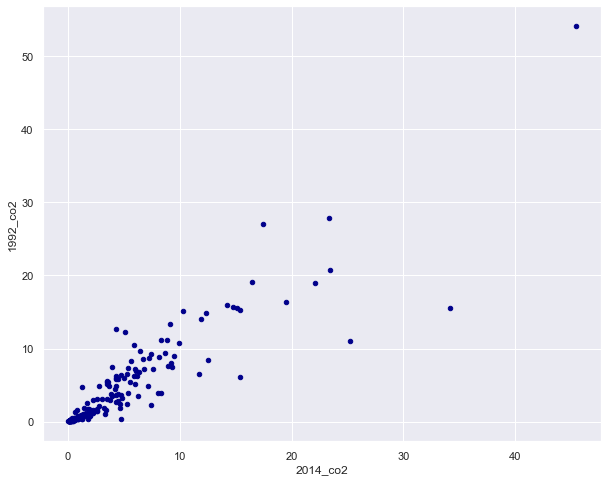

In [22]:
df_combined.loc[:,'1992_co2':'2014_co2'].plot(kind='scatter', x='2014_co2', y='1992_co2', c='darkblue', figsize=(10,8));

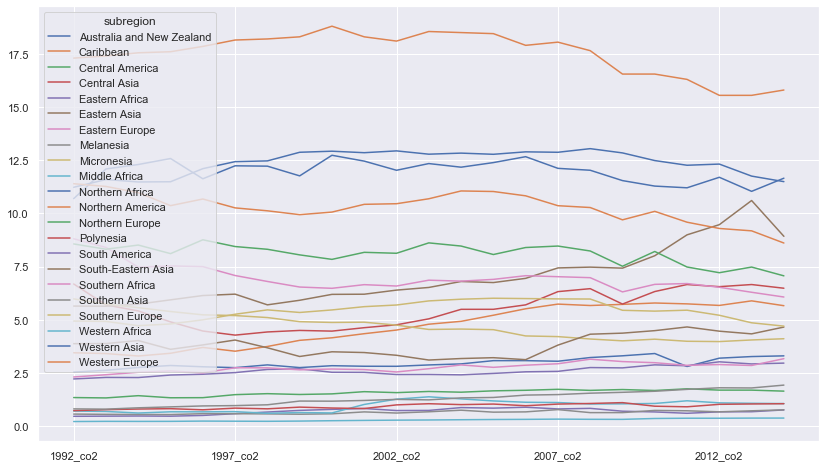

In [26]:
df_combined.groupby('subregion').mean().loc[:,'1992_co2':'2014_co2'].T.plot(figsize=(14,8));

In [ ]:
def calculate_growth_factor_by_region(df=None, indicator=''):
    """calculates the growth factor of an indicator for the years between 1992 and 2014 grouped by region"""
    
    lower_bound = '1992_' + str(indicator)
    upper_bound = '2014_' + str(indicator)
    
    growth_factor = (df.groupby('region').mean()[upper_bound] - 
                     df.groupby('region').mean()[lower_bound]) / df.groupby('region').mean()[lower_bound]
    
    return growth_factor


diff_co2_region = calculate_growth_factor_by_region(df_combined,'co2')

ax = diff_co2_region.plot(kind='bar', figsize=(10,8));
ax.set_title('Difference in per capita CO2 emissions between 1992-2014')

# adding the value to the top of the bar
x_offset = -0.15
y_offset = 0.01
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format((b.y1 + b.y0))
    y = b.y1 + y_offset
    if y < 0: y = y_offset
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, y))

Afrika's per capita emissions have risen the most and Europe has made the biggest efforts in reducing CO2 emissions between 1992 and 2014. 
But how big is the effect? To understand this more, we need to have a look at the population distribution:

In [ ]:
# separate slices of pie for better readability
explode = [0.05] * len(df_combined['region'].unique())

ax =df_combined.groupby('region').sum()['2014_population'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', explode = explode, pctdistance=0.85, startangle=90);
ax.set_title('Global Population by Region')
ax.set_ylabel('');

Asia accounts for 60.2% of the global population, so an increase in per capita CO2 emissions by 17% as compared to the 44% increase in Africa still has the bigger effect on overall emissions. For better comprehensibility, let's compare overall emissions by region from 1992 to those in 2014:

In [ ]:
emissions_92 = df_combined.groupby('region').mean()['emissions_92']
emissions_14 = df_combined.groupby('region').mean()['emissions_14']

labels = emissions_92.index.tolist()
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, emissions_92, width, label='CO2 Emissions \'92')
rects2 = ax.bar(x + width/2, emissions_14, width, label='CO2 Emissions \'14')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('t of CO2')
ax.set_title('Difference in CO2 Emissions per Region')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

Unfortunately, Africa's increasing CO2 emissions is not the main problem, nor are Europe's efforts in reducing CO2 emissions the solution. The problem is the rising population, mainly in Asia that basically wipes off Europe's efforts.

One interesting side question: How did the fall of the soviet union impact CO2 emissions given the loss of industry in the post soviet states. If one splits the European countries in those who were part of the soviet union and those who were not, it reveals some insight into Europe's good performance:

In [ ]:
europe_alpha3 = df_combined[df_combined.region == "Europe"].alpha3Code.tolist()
post_soviet_alpha3 = ['RUS','BLR','MDA','UKR','KAZ','KGZ','TJK','TKM','UZB','ARM','AZE','GEO','LTU','LVA','EST']

post_soviet_part_of_europe = [item for item in post_soviet_alpha3 if item in europe_alpha3]
europe_wo_post_soviet = [item for item in europe_alpha3 if item not in post_soviet_part_of_europe]

df_eu_sov = df_combined[df_combined.alpha3Code.isin(post_soviet_part_of_europe)]
df_eu_nsov = df_combined[df_combined.alpha3Code.isin(europe_wo_post_soviet)]

diff_co2_post_sov = calculate_growth_factor(df_eu_sov, 'co2')
diff_co2_post_europe = calculate_growth_factor(df_eu_nsov, 'co2')

# Create a bar chart with proper labels
locations = [1, 2]
heights = [diff_co2_post_sov.mean(), diff_co2_post_europe.mean()]
labels = ['Post Soviet Countries of Europe', 'Europe w/o Post-Soviet Countries']


f, ax = plt.subplots(figsize=(14,6))
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean CO2 emissions reduction per capita for European countries')
plt.ylabel('CO2 reduction rate');

Finally, let's have a look at the historic GDP and compare have the GDP per capita has changed by region between 1992-2014:

In [ ]:
gdp_92 = df_combined.groupby('region').mean()['1992_gdp']
gdp_14 = df_combined.groupby('region').mean()['2014_gdp']

labels = gdp_92.index.tolist()
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, gdp_92, width, label='GDP per capita \'92')
rects2 = ax.bar(x + width/2, gdp_14, width, label='GDP per capita \'14')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('USD')
ax.set_title('Difference GDP per capita between 1992-2014')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

### Research Question 2: What is associated with increasing/ decreasing, high/ low CO2 emissions?

Is a growth in CO2 emissions bound to higher or lower population growth and growth in GDP. Is the trend the relevant factor or the current development state of a nation. First let's create four groups that we will explore: increasing and decreasing CO2 emissions and CO2 emissions above and below the median in 1992.

In [ ]:
# histogram of population growth split between increasing and decreasing
increasing_co2 = df_combined.diff_co2 > 0
declining_co2 = df_combined.diff_co2 < 0
above_median_co2 = df_combined['1992_co2'] > df_combined['1992_co2'].median()
below_median_co2 = df_combined['1992_co2'] < df_combined['1992_co2'].median()

First, let's have a look if increasing or decreasing CO2 emissions is associated with population growth

In [ ]:
bins = np.linspace(-1, 4, 30)
values = [df_combined[increasing_co2]['diff_population'].values, 
          df_combined[declining_co2]['diff_population'].values]

plt.figure(figsize=(12,6))

# the counts normalized to form a probability density
plt.hist(values, bins, density=True, label=['Increasing CO2', 'Decreasing CO2']);
plt.legend(loc='upper right')
plt.title('Population growth in comparison to increasing/ decreasing CO2 emissions');

There is a slight shift to the left which could mean that countries that have decreasing CO2 emissions tend to grow less in population than those with increasing CO2. However, this seems to be quite a vague statement, so maybe splitting in groups below and above the median might reveal more insight:

In [ ]:
bins = np.linspace(-1, 4, 30)
values = [df_combined[above_median_co2]['diff_population'].values, 
          df_combined[below_median_co2]['diff_population'].values]

plt.figure(figsize=(12,6))

# the counts normalized to form a probability density
plt.hist(values, bins, density=True, label=['Above Median CO2', 'Below Median CO2']);
plt.legend(loc='upper right')
plt.title('Population growth in comparison to CO2 emissions above and below median');

Here the shift is more clear. One could argue that those countries, who already had higher emissions have more wealth.  It is known that [more developed countries have a declining birthrate](https://www.stlouisfed.org/on-the-economy/2016/december/link-fertility-income). Let's compare:

In [ ]:
above_median_gdp = df_combined['1992_gdp'] > df_combined['1992_gdp'].median()
below_median_gdp = df_combined['1992_gdp'] < df_combined['1992_gdp'].median()

above_med_co2gdp = len(df_combined[(above_median_co2) & (above_median_gdp)])
above_med_co2_below_gdp = len(df_combined[(above_median_co2) & (below_median_gdp)])

# Create a bar chart with proper labels
locations = [1, 2]
heights = [above_med_co2gdp, above_med_co2_below_gdp]
labels = ['Above Median Emissions and GDP', 'Above Median Emissions but below median GDP']


f, ax = plt.subplots(figsize=(14,6))
plt.bar(locations, heights, tick_label=labels)
plt.title('Does above median CO2 imply above median GDP?')
plt.ylabel('Number of Countries');

As can be seen, there is a clear tendency that countries with above median emissions also have an above median GDP and higher GDP means declining birthrate.

Furthermore, let's explore how increasing/ decreasing CO2 emissions are related to GDP growth:

In [ ]:
sns.jointplot(data=df_combined[increasing_co2], x = 'diff_co2', y = 'diff_gdp', kind="reg", height=10);

In [ ]:
df_combined[increasing_co2].corr(method='pearson')['diff_co2'].nlargest(3)

In [ ]:
sns.jointplot(data=df_combined[declining_co2], x = 'diff_co2', y = 'diff_gdp', height=10);

In [ ]:
df_combined[declining_co2].corr(method='pearson')['diff_co2'].nlargest(3)

There seems to be a strong correlation between increasing CO2 emissions and GDP growth, but for declining CO2 emissions there is relationsship to be found. It might be because there are developed countries that do well and take active measures do decrease their emissions, but there are also countries whose economies are in decline because of various reasons, like war or climate change.

<a id='conclusions'></a>
## Conclusions

In summary, this exploration revealed that since the UNFCCC in 1992 only Europe managed to decrease it's CO2 emissions. A big part of its success is not based on the fall on the soviet union and its dying industry that could not compete with the global competition. However, globally emissions are still rising which should make us think: Would it make more sense for the EU to spend money on climate mitiation strategies in Asia, rather than trying to improve efficiency of already efficient goods within the EU.
It is also visible that countries with lower CO2 emissions still have a higher population growth and that declining CO2 emissions do occur for various reasons and are not connected to GDP growth.

Given that the countries lack meta-data, it is harder to create meaningful visualisations that include single countries as well as continents or sub-regions within a continent. CO2 emissions per country do not include international flights, nor international freight, so the global picture on emissions is still somehow distorted.